## ADA final exam (Fall 2022)

This exam consists of 3 tasks. Tasks 2 and 3 are independent of each other (although conceptually related).


## Dataset

For a Wikipedia editor to become an administrator, a so-called “request for adminship” ([RfA](https://en.wikipedia.org/wiki/Wikipedia:Requests_for_adminship)) must be submitted by either the candidate or another community member. Subsequently, any Wikipedia member may cast a supporting or opposing vote. Here we provide a simplified version of the Wikipedia RfA dataset, containing all votes from 2003 through 2012.

###  Data format

|        |   SRC |   TGT |   VOT |   RES |   YEA | DAT                 | TXT                                                                                                                                                                                               |
|-------:|------:|------:|------:|------:|------:|:--------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  39054 |  3444 | 10170 |     1 |     1 |  2009 | 2009-07-01 17:50:00 | '''Support''' - Best of luck. &nbsp;                                                                                                                                                              |
| 159680 |   722 |  9634 |    -1 |    -1 |  2006 | 2006-12-15 07:28:00 | '''Oppose''' Not even 2000 edits.                                                                                                                                                                 |
| 173438 |  4194 |  5524 |     1 |     1 |  2005 | 2005-03-18 19:22:00 | Ohhh, you're Carrp!  In that case, '''Support'''.                                                                                                                                                 |
|  60627 |  4855 |  9436 |     1 |     1 |  2008 | 2008-12-18 23:26:00 | '''Support''' via thoughtful answer to my question that demonstrates this editor has clue.                                                 |
| 194809 |  7687 |   908 |     1 |     1 |  2004 | 2004-09-25 05:21:00 | Nicholas is very good in English. Also, he got '''exceptional''' patience to explain petty obvious facts in talk page to convince ignorants. Let the world be benefitted more out of his work. -- |


- SRC: the user name of the source of the vote, i.e., of the user who cast the vote.
- TGT: the user name of the target of the vote, i.e., of the user running for election.
- VOT: the source's vote on the target (-1 = oppose; 1 = support).
- RES: the outcome of the election (-1 = target was rejected as admin; 1 = target was accepted). **(We will not use this  column in this exam.)**
- YEA: the year of the RfA.
- DAT: the date and time of this vote. **(We will not use this column in this exam.)**
- TXT: the comment written by the source. **(We will not use this column in this exam.)**

---


## Structural balance theory

**Structural balance theory** affirms that social networks tend to be organized so as to avoid conflictual situations, e.g., if a great friend of yours hates someone, you will likely not befriend that person.

The theory can be operationalized by looking at _triangles_ in an undirected _signed graph_ capturing person-to-person relationships, where a _signed graph_ is a  graph in which each edge is associated with a positive or negative sign, and a _triangle_ is a set of three edges ($\langle u,v \rangle$, $\langle v,w\rangle$, $\langle u,w\rangle$) that fully connect three distinct nodes ($u, v, w$).



_Triangles_ in an undirected signed graph can be in 4 _configurations_:
all positive edges ($\{+,+,+\}$); 
all negative edges ($\{-,-,-\}$); 
two positive edges and one negative edge ($\{+,+,-\}$);
one positive edge and two negative edges ($\{+,-,-\}$).

Structural balance theory posits that social networks tend to favor triangle configurations with an even number of negative signs (i.e., $\{+,+,+\}$ and $\{+,-,-\}$), which can be understood as being “balanced” by avoiding conflictual situations. Intuitively, $\{+,+,+\}$ could be tagged as “The friend of my friend is my friend”, and $\{+,-,-\}$ as “The enemy of my enemy is my friend”, “The friend of my enemy is my enemy”, or “The enemy of my friend is my enemy”. On the contrary, triangle configurations with an odd number of negative signs (i.e., $\{+,+,-\}$ and $\{-,-,-\}$) are unstable (“unbalanced”) according to structural balance theory and will thus occur less frequently in social networks. For instance, me being friends with two mutual enemies ($\{+,+,-\}$) would lead to tension that could be resolved if the two enemies became friends or if I took sides and ended my friendship with one of the two. Similarly, two among three mutual enemies ($\{-,-,-\}$) would have the incentive to form an alliance to “gang up” against the third.

Some social scientists have argued that three mutual enemies ($\{-,-,-\}$) is not necessarily a triangle configuration that social networks tend to avoid. This gives rise to **weak structural balance theory**, which only posits that social networks tend to avoid the “unbalanced” triangle configuration $\{+,+,-\}$.

In a nutshell,
- structural balance theory
  - considers $\{+,+,+\}$, $\{+,-,-\}$ as balanced,
  - and $\{+,+,-\}$, $\{-,-,-\}$ as unbalanced;
- weak structural balance theory
  - considers $\{+,+,+\}$, $\{+,-,-\}$, $\{-,-,-\}$ as balanced,
  - and $\{+,+,-\}$ as unbalanced.



In [2]:
import sys
try:
    assert 'adaexam' in sys.executable
except AssertionError:
    print('Seems the adaexam conda environment is not your active environment!')
    raise

print(f'Python path: {sys.executable}')

Python path: C:\Users\nerea\anaconda3\envs\adaexam\python.exe


In [3]:
''' Package import test '''
import os
import gzip
import random
import pickle
import re
import itertools
import collections
import operator
import requests
from urllib.parse import *
from datetime import *
from dateutil.parser import parse

import math
import sklearn
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import *

import ast
import gensim
import string
import nltk
import codecs
import json
import vaderSentiment
import spacy
from empath import Empath
from bs4 import BeautifulSoup

import networkx as nx

from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

print("Package import test successful!")

Package import test successful!


### Task 1: Preliminaries

As a good data scientist, you first load the data and explore it.

**1.1**
Load the csv file `wiki-RfA.csv.gz` in a pandas dataframe. Calculate the number of distinct RfAs and the average number of votes per RfA.
- **Hint:** Throughout this question, assume that each RfA is uniquely determined by the column `TGT` and each vote is uniquely determined by the combination of `SRC` and `TGT`.

In [25]:
# 1.1
RFA = pd.read_csv('./wiki-RfA.csv')
RFA.head()

,SRC,TGT,VOT,RES,YEA,DAT,TXT
0,5943,9966,-1,-1,2012,2012-12-30 22:27:00,—
1,9153,9966,-1,-1,2012,2012-12-30 22:25:00,"'''Oppose'''. This joke really isn't funny, no..."
2,4189,9966,-1,-1,2012,2012-12-30 22:17:00,'''Oppose''' as per nomination and answers. --...
3,3750,9966,-1,-1,2012,2012-12-30 22:14:00,'''Oppose''' and '''speeedy close''' this as [...
4,4225,9966,-1,-1,2012,2012-12-30 22:08:00,'''Oppose''' per nomination and answers. I am ...


In [28]:
RFA.loc[RFA['TGT'] == 9967] #To make sure the code was right after

,SRC,TGT,VOT,RES,YEA,DAT,TXT
7736,6175,9967,1,1,2011,2011-08-19 15:05:00,"'''Support'''. Most definitely. <font color=""n..."
7737,4683,9967,1,1,2011,2011-08-19 10:40:00,"'''Support''' Damn you, peer pressure! Honestl..."
7738,4059,9967,1,1,2011,2011-08-19 09:48:00,'''Absolutely not'''...''obviously'' evading t...
7739,2602,9967,1,1,2011,2011-08-19 07:54:00,'''Support''' From the diffs that Dcoetzee has...
7740,3940,9967,1,1,2011,2011-08-19 07:46:00,Thoroughly impressed with your track record. I...
...,...,...,...,...,...,...,...
7894,10631,9967,1,1,2011,2011-08-12 17:04:00,'''Support''' Most definitely!
7898,5729,9967,1,1,2011,2011-08-12 16:38:00,'''Support'''
7899,1595,9967,1,1,2011,2011-08-12 16:37:00,'''Support''' No reason to think they'll misus...
7901,5195,9967,1,1,2011,2011-08-12 16:25:00,'''Support''' Obviously. [[Special:Contributio...


In [35]:
#we assume there are as many RFAs as users running for election
print('The number of disctinc RFAs is :' ,RFA['TGT'].nunique()) 

The number of disctinc RFAs is : 3439


In [36]:
RFA_grouped_target_size = RFA.groupby(['TGT'], as_index = False)['SRC'].nunique()
RFA_grouped_target_size

,TGT,SRC
0,2,12
1,4,106
2,5,99
3,7,14
4,8,9
...,...,...
3434,11008,49
3435,11010,60
3436,11013,74
3437,11014,14


In [37]:
print('Average number votes per RFA :', RFA_grouped_target_size['SRC'].mean())

Average number votes per RFA : 48.561500436173304


**1.2** 
In a single figure with three subfigures (one per item), show the following time series:
- the number of RfAs per year;
- the overall fraction of positive votes per year; and 
- the average number of votes per RfA per year.

For each of the above three quantities, print the value for the year 2008.

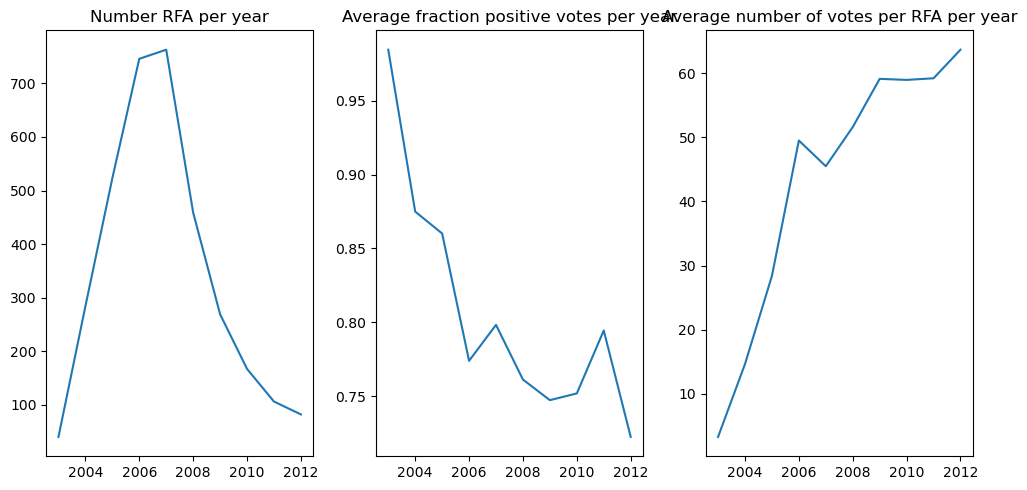

In [77]:
# 1.2 

RFA_year = RFA.copy()
RFA_year_numFRA = RFA_year.sort_values('YEA').drop_duplicates('TGT')
RFA_year_numFRA = RFA_year_numFRA.groupby('YEA', as_index = False).agg({'TGT': 'size'})
RFA_year['pos_votes'] = np.where(RFA_year['VOT'] == 1, 1, 0)
RFA_year_pos = RFA_year.groupby('YEA', as_index = False)['pos_votes'].apply(lambda x: sum(x)/x.size)
RFA_year_avg_votes = RFA_year.groupby(['YEA', 'TGT'], as_index = False)['VOT'].count()
RFA_year_avg_votes = RFA_year_avg_votes.groupby('YEA', as_index = False)['VOT'].mean()
fig, ax = plt.subplots(1,3, figsize = [10,5])
ax[0].plot(RFA_year_numFRA['YEA'], RFA_year_numFRA['TGT'])
ax[0].set_title('Number RFA per year')
ax[1].plot(RFA_year_pos['YEA'], RFA_year_pos['pos_votes'])
ax[1].set_title('Average fraction positive votes per year')
ax[2].plot(RFA_year_avg_votes['YEA'], RFA_year_avg_votes['VOT'] )
ax[2].set_title('Average number of votes per RFA per year')
plt.tight_layout()

**1.3** 
**/Discuss:/** Describe the temporal patterns observed in the plots you did in **T1.2**.

**A1.3** 
From the obtained results, there was a pick in the number of RFA per year around 2007, and then it has decreased again.
The number of votes per year is increasing with time and those votes are more and more negative.

**1.4** 
Create an undirected graph ([`nx.Graph`](https://networkx.org/documentation/stable/reference/classes/graph.html)) where every node corresponds to a Wikipedia user (source or target of an RfA) and where there exists an edge between two users if at least one of them has voted on the other. Each edge should have attributes corresponding to columns of the dataframe, namely:
- `VOT`, which equals `1` if the vote was positive, and `-1` otherwise.
- `YEA`, an integer that represents the year of the RfA.

**The code to load the graph has been provided to you!** After running it, print the number of nodes and edges in your graph.

---

**Observation:** Note that we have at most one edge per pair of nodes in the graph, even though two votes may be associated with the pair  — e.g., if A voted in B's RfA in time $t_1$ and B voted in A's RfA in time $t_2$ ($t_1 < t_2$). In these cases, the code provided associates the metadata of the oldest vote ($t_1$ in the example) to the edge between A and B.

In [79]:
# Provided code! Do not change!
import networkx as nx
import pandas as pd
G = nx.from_pandas_edgelist(pd.read_csv("./wiki-RfA.csv"), 
                            'SRC', 'TGT', ['VOT', 'RES', 'YEA', 'DAT'], create_using=nx.Graph)

In [81]:
# 1.4
print('Num nodes: ', G.number_of_nodes())
print('Num edges: ',  G.number_of_edges())
      

Num nodes:  10831
Num edges:  161147


**1.5** 
Plot the **complementary** cumulative distribution of the degree centrality of the undirected graph. Use a logarithmic (base 10) x-axis and a linear y-axis.

In [272]:
# 1.5
#first compute degree centrality per node
centralities = nx.degree_centrality(G)
cent_values = [v for v in centralities.values()]

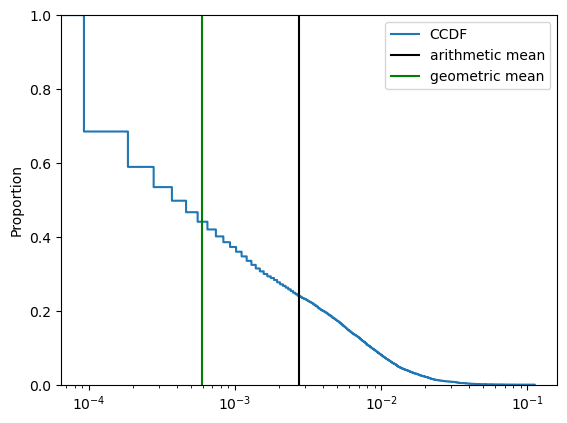

In [273]:
# this is from homework 2 for the complementary cum dist 
import scipy.stats.mstats  as mstats
sns.ecdfplot(cent_values, complementary=True, label="CCDF")
plt.xscale("log")  #log10 scale for the x axis
plt.axvline(np.mean(cent_values), color="black", label="arithmetic mean")
plt.axvline(mstats.gmean(cent_values), color="green", label="geometric mean")
plt.legend()


**1.6**
**/Discuss:/** Why is the following statement false? Justify your answer. **"From the graph obtained in task 1.5, one can conclude that around 40% of the users voted at least 11 times."**


In [274]:
0.001 * 10831

10.831

**A1.6**
40% of the users have a degree centrality of less than 0.001, meaning they gave votes to less than 0.001*total_num_nodes = 10.831 users.

**1.7**
What fraction of users voted at least 11 times? Use the data to measure the fraction.

In [275]:
# 1.7
degree_11 = 11/G.number_of_nodes()
fraction = len([i for i in cent_values if i>=degree_11]) / len(cent_values)
print('The fraction is: ', fraction)

The fraction is:  0.3725417782291571


### Task 2: Triangles

Next, you set out to investigate the social balance theory by looking at the RfA graph.

**2.1**
Considering _only_ the RfAs of 2004 (i.e., where `YEA == 2004`), generate all triangles in the undirected graph.
Print the number of triangles found.
- **Hint:** Note that you can generate a graph with only a subset of nodes and edges via ` G.edge_subgraph`.
-  **Hint:** The function `nx.enumerate_all_cliques` generates all cliques in an undirected graph. First, all cliques of size 1 are generated, then all cliques of size 2, etc. Triangles are cliques of size 3.


In [276]:
# 2.1
RFA_2004 = RFA.copy()
RFA_2004 = RFA_2004.loc[RFA['YEA'] == 2004].copy(deep=True)
G_2004 = nx.from_pandas_edgelist(RFA_2004, 
                            'SRC', 'TGT', ['VOT', 'RES', 'YEA', 'DAT'], create_using=nx.Graph)

In [277]:
cliques = list(nx.enumerate_all_cliques(G_2004))

In [278]:
triangles = []
for clic in cliques:
    if len(clic)==3:
        triangles.append(clic)
        
print('The number of triangles found is: ',len(triangles))

The number of triangles found is:  8448


**2.2 ** **/True or false:/** Is the following statement true or false? Justify your answer. **"The node with the highest clustering coefficient in an undirected graph is the node that belongs to the largest number of triangles."**

**A2.2**
The node with the highest clustering coefficient is the node for which more of his neighbors are connected between them. Here the node appearing most in the triangles is the one for which more of his neighbors are connected pairwise, hence it is true.

**2.3** Considering the set of triangles previously calculated, estimate the fraction of triangles of configurations
 $\{+,+,+\}$,  $\{-,-,-\}$,  $\{+,+,-\}$, and $\{+,-,-\}$. What fraction of triangles are "balanced" according to structural balance theory?

In [279]:
# 2.3
#First from the edges I need to get the attributes (-1,1)
#we can do this using conditions (if edge between node 1 and 2 vot == 1 and 2 and 3 the same then conf +++ sum 1)
all_pos = 0
all_neg = 0
most_pos = 0
most_neg = 0
votes = nx.get_edge_attributes(G_2004,'VOT')

for tri in triangles:
    if ((votes[tri[0],tri[1]] == 1) and (votes[tri[0],tri[2]] == 1) and (votes[tri[1],tri[2]] == 1)):
        all_pos +=1
    elif ((votes[tri[0],tri[1]] == 1) and (votes[tri[0],tri[2]] == 1) and (votes[tri[1],tri[2]] != 1)): 
        most_pos += 1
    elif ((votes[tri[0],tri[1]] != 1) and (votes[tri[0],tri[2]] == 1) and (votes[tri[1],tri[2]] == 1)): 
        most_pos += 1
    elif ((votes[tri[0],tri[1]] == 1) and (votes[tri[0],tri[2]] != 1) and (votes[tri[1],tri[2]] == 1)): 
        most_pos += 1
    elif ((votes[tri[0],tri[1]] != 1) and (votes[tri[0],tri[2]] == 1) and (votes[tri[1],tri[2]] != 1)): 
        most_neg += 1
    elif ((votes[tri[0],tri[1]] != 1) and (votes[tri[0],tri[2]] != 1) and (votes[tri[1],tri[2]] == 1)): 
        most_neg += 1
    elif ((votes[tri[0],tri[1]] == 1) and (votes[tri[0],tri[2]] != 1) and (votes[tri[1],tri[2]] != 1)): 
        most_neg += 1
    elif ((votes[tri[0],tri[1]] != 1) and (votes[tri[0],tri[2]] != 1) and (votes[tri[1],tri[2]] != 1)): 
        all_neg += 1

print(all_pos, all_neg, most_pos, most_neg)   
print(np.sum([all_pos, all_neg, most_pos, most_neg])) #to make sure I did not forget any triangle
fractions = [all_pos/len(triangles), all_neg/len(triangles), most_pos/len(triangles), most_neg/len(triangles)]
print(fractions)

6696 44 1178 530
8448
[0.7926136363636364, 0.005208333333333333, 0.13944128787878787, 0.06273674242424243]


In [280]:
#According to the theory, the balanced ones are the ones having an even number of neg signs

even_neg = (all_pos + most_neg)/len(triangles)

print('Number of balanced triangles = ', even_neg)

Number of balanced triangles =  0.8553503787878788


**2.4** To observe how triangle configurations would be distributed under a random null model, do the following:
- Create a new column `VOT_RND` in the dataframe, where RfA votes (i.e., edge signs in the graph) are shuffled, i.e., permuted randomly.  For shuffling, use `numpy.random`, without replacement and with the seed 32 (see code provided below).
- Create a new edge attribute with the values of `VOT_RND` in the graph you created in task **1.4**. You can do this easily using the  [`set_edge_attributes`](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_edge_attributes.html) function.
- Considering the shuffled edge signs,  compute the fraction of triangles in each configuration ($\{+,+,+\}$,  $\{-,-,-\}$,  $\{+,+,-\}$, $\{+,-,-\}$). Moreover, compute the fraction of triangles that are "balanced" according to structural balance theory. (Reminder: consider only the RfAs of 2004.)


In [281]:
# PROVIDED STUB FOR 2.4
import numpy as np
np.random.seed(32)
RFA_2004["VOT_RND"] = np.random.choice(RFA_2004["VOT"].values, size=len(RFA_2004), replace=False)

In [282]:
VOT_RND = list(RFA_2004["VOT_RND"])

In [283]:
# 2.4
nx.set_edge_attributes(G_2004, VOT_RND, "VOT_RND")

In [284]:
# Here repeat code of previous task
votes_RND = nx.get_edge_attributes(G_2004,'VOT_RND')

all_pos_RND = 0
all_negs_RND = 0
most_pos_RND = 0
most_negs_RND = 0

for tri in triangles:
    if ((votes_RND[tri[0],tri[1]] == 1) and (votes_RND[tri[0],tri[2]] == 1) and (votes_RND[tri[1],tri[2]] == 1)):
        all_pos_RND +=1
    elif ((votes_RND[tri[0],tri[1]] == 1) and (votes_RND[tri[0],tri[2]] == 1) and (votes_RND[tri[1],tri[2]] != 1)): 
        most_pos_RND += 1
    elif ((votes_RND[tri[0],tri[1]] != 1) and (votes_RND[tri[0],tri[2]] == 1) and (votes_RND[tri[1],tri[2]] == 1)): 
        most_pos_RND += 1
    elif ((votes_RND[tri[0],tri[1]] == 1) and (votes_RND[tri[0],tri[2]] != 1) and (votes_RND[tri[1],tri[2]] == 1)): 
        most_pos_RND += 1
    elif ((votes_RND[tri[0],tri[1]] != 1) and (votes_RND[tri[0],tri[2]] == 1) and (votes_RND[tri[1],tri[2]] != 1)): 
        most_negs_RND += 1
    elif ((votes_RND[tri[0],tri[1]] != 1) and (votes_RND[tri[0],tri[2]] != 1) and (votes_RND[tri[1],tri[2]] == 1)): 
        most_negs_RND += 1
    elif ((votes_RND[tri[0],tri[1]] == 1) and (votes_RND[tri[0],tri[2]] != 1) and (votes_RND[tri[1],tri[2]] != 1)): 
        most_negs_RND += 1
    elif ((votes_RND[tri[0],tri[1]] != 1) and (votes_RND[tri[0],tri[2]] != 1) and (votes_RND[tri[1],tri[2]] != 1)): 
        all_negs_RND += 1

print(all_pos_RND, all_negs_RND, most_pos_RND, most_negs_RND)   
print(np.sum([all_pos_RND, all_negs_RND, most_pos_RND, most_negs_RND])) #to make sure I did not forget any triangle
fractions_RND = [all_pos_RND/len(triangles), all_negs_RND/len(triangles), most_pos_RND/len(triangles), most_negs_RND/len(triangles)]
print(fractions_RND)

0 8448 0 0
8448
[0.0, 1.0, 0.0, 0.0]


**2.5** **/Discuss:/** Do the results of tasks **2.3** and **2.4** suggest that structural balance theory is correct? What kind of subsequent analysis would make you trust that the results are not obtained simply by chance? (No need to actually perform that subsequent analysis here.) Justify your answer.

**A2.5** 
From the code above I imagine there is a bug because I only obtain values all negative votes between the triangles, hence I can not discuss.

### Interlude: Additional data

In the data provided in the file `wiki-RfA.csv.gz` (with which you’ve worked up to now), each column corresponds to a vote from a user $u$ to a user $v$ at a time $t$. 

In **Task 2**, we did not consider the temporal aspect of this network. For the next task, you are provided with a complimentary dataset (`data/wiki-RfA_extra.csv.gz`) containing, for each vote (uniquely determined by `SRC` and `TGT`), a variety of features. **Importantly, these features were calculated considering only data that was already available at the time when the respective vote was cast.** The features are described as follows.

- `PP`, `NN`, `PN` — Each vote (signed edge) is part of zero or more triangles, and we computed the number of triangles in which the two remaining edges were both positive (`PP`), both negative (`NN`) and of different signs (i.e., one positive and one negative, `PN`). This considers only the votes the target (denoted by `TGT`) has received before the current vote. 

- `P`, `N` — The number of positive (`P`) and negative (`N`) votes that the target `TGT` received before the current vote.

- `TXT_PROCESSED` — The text in the original dataset, processed so 1) it is entirely lower-case, 2) it does not contain non-alphanumeric characters, and 3) it does not contain words starting with “supp” or “opp” (since words such as "support" and "oppose"  are obvious give-away signals of the vote).

### Interlude: Predicting edge signs with structural balance theory

We can use structural balance theory to predict edge signs. 

Consider an edge whose sign we do not know, as well as the fractions `PP`, `NN`, and `PN` associated with the edge, as defined above. 

According to structural balance theory, if `PP` + `NN` $\geq$ `PN`, the vote is predicted to be positive, as this will create more balanced triangles in the graph. Otherwise, it is predicted to be negative. 

According to the weak structural balance theory, if `PP` $\geq$ `PN`, the vote is predicted to be positive, as this will create more balanced triangles in the graph. Otherwise, it is predicted to be negative. 

Note that in both cases we use “$\geq$” rather than “<”, i.e., when both sides of the equation are equal, we break ties in favor of positive edges. We do so because there are more positive edges in the graph.

### Task 3: Predict it!

In the final part of the exam, you will leverage your machine learning and regression skills.

**3.1** Merge the new dataset with the original dataframe from task **1** using the columns `SRC` and `TGT`. You may drop the old `TXT` column if you want to. 


In [285]:
# 3.1
RFA_total = RFA.copy()
RFA_total = RFA_total.merge(pd.read_csv('./wiki-RfA_extra.csv'), on = ['SRC', 'TGT']).drop(columns = 'TXT')

In [286]:
RFA_total.head(5)

,SRC,TGT,VOT,RES,YEA_x,DAT,YEA_y,PP,NN,PN,N,P,TXT_PROCESSED
0,5943,9966,-1,-1,2012,2012-12-30 22:27:00,2012,2,0,4,12,0,
1,9153,9966,-1,-1,2012,2012-12-30 22:25:00,2012,2,1,3,11,0,this joke really isn t funny not even if you ...
2,4189,9966,-1,-1,2012,2012-12-30 22:17:00,2012,0,0,2,10,0,as per nomination and answers
3,3750,9966,-1,-1,2012,2012-12-30 22:14:00,2012,0,0,0,9,0,and speeedy close this as wp snow as it s cle...
4,4225,9966,-1,-1,2012,2012-12-30 22:08:00,2012,0,0,1,8,0,per nomination and answers i am particularly ...


**3.2**  Create the following two rule-based classifiers, and for each, estimate its area under the ROC curve (a.k.a. “AUC/ROC”) on the entire dataset:

- **A)** a classifier inspired by structural balance theory. The classifier should predict a positive vote if  `PP` + `NN` $\geq$ `PN`, and a negative vote otherwise.
- **B)** a classifier inspired by weak structural balance theory. The classifier should predict a positive vote if `PP`  $\geq$ `PN` and a negative vote otherwise.

In [287]:
# 3.2
y_true = np.where(RFA_total['VOT']==1,1,0)
y_pred_struct = np.where((RFA_total['PP']+ RFA_total['NN']>= RFA_total['PN']),1,0)
y_pred_weak = np.where((RFA_total['PP']>= RFA_total['PN']),1,0)
from sklearn.metrics import roc_auc_score
auc_roc_struct = roc_auc_score(y_true, y_pred_struct)
auc_roc_weak = roc_auc_score(y_true, y_pred_weak)
print('The AUC/ROC for the structural predictor is ', auc_roc_struct, ' and for the weak predictor is ', auc_roc_weak)

The AUC/ROC for the structural predictor is  0.525390127858417  and for the weak predictor is  0.528036104766419


**3.3** To determine if the differences in the classifiers from task **3.2** occur solely due to chance, follow the following bootstrap procedure, using 200 iterations:

- **A)** Randomly sample the entire dataset (i.e., votes from the dataframe constructed in task **3.1**) with replacement;
- **B)** Compute the difference of the AUC/ROC for the two classifiers on the entire dataset.

Then use the distribution of AUC/ROC differences (one difference per bootstrap iteration) to estimate the 95% confidence interval for the AUC/ROC difference.

In [288]:
def bootstrap_CI_ROC_diff(data,alpha = 0.05, n_samples = 1000):
    #create an empty list to store the results
    results = []
    #run the bootstrap
    for i in range(n_samples):
        #make a sample with replacement
        sample = data.sample(n = len(data), replace = True)
        #calculate the statistic of interest
        y_true = np.where(data['VOT']==1,1,0)
        y_pred_struct = np.where((data['PP']+ data['NN']>= data['PN']),1,0)
        y_pred_weak = np.where((data['PP']>= data['PN']),1,0)
        auc_roc_struct = roc_auc_score(y_true, y_pred_struct)
        auc_roc_weak = roc_auc_score(y_true, y_pred_weak)
        results.append(auc_roc_struct - auc_roc_weak )
    #calculate the confidence interval
    results = pd.Series(results)
    CI = results.quantile([alpha/2, 1-alpha/2])
    return CI

In [289]:
bootstrap_CI_ROC_diff(RFA_total, alpha = 0.05, n_samples = 200)

0.025   -0.002646
0.975   -0.002646
dtype: float64

**3.4 ** **/Discuss:**/ According to the results in tasks **3.2** and **3.3**, which theory better predicts actual edge signs, structural balance theory or the weak structural balance theory? 


**A3.4**  As 0 is not in the 95% range of the differences, it seems that the weak theory predicts better the actual results (only slightly better)

**3.5** How accurately can we predict the vote with more sophisticated features and algorithms?

- Create a TF-IDF representation of the text of each vote  using `sklearn`'s vectorizer ([`sklearn.feature_extraction.text.TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)) with the parameters `max_features=150` and `stop_words='english'`.
- Split the  dataset into training and test sets using sklearn [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) using parameters `test_size=0.1` and  `random_state=42`.

- Then, train two logistic regression models ([`sklearn.linear_model.SGDClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)) using parameters `loss='log_loss'` and `max_iter=2000` considering:

    - **1)** the TF-IDF feature vector

    - **2)** the TF-IDF feature vector and the features `PP`, `NN`, `PN`, `P`, and `N` related to the graph.

- Last, report the AUC/ROC of each model in the test set.

In [290]:
# 3.5
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
   RFA_total.fillna(0) , y_true, test_size=0.1, random_state=42)


In [291]:
vectorizer = TfidfVectorizer(max_features=150,stop_words='english' )
text_feats_train = vectorizer.fit_transform(X_train['TXT_PROCESSED'].values.astype('U'))
text_feats_test = vectorizer.fit_transform(X_test['TXT_PROCESSED'].values.astype('U'))

In [292]:
X_train_onlytext = pd.DataFrame(text_feats_train.toarray())

X_train_complete = pd.concat([pd.DataFrame(X_train[['PP', 'NN', 'PN', 'N']].fillna(0)), X_train_onlytext], axis = 1)
X_test_onlytext = pd.DataFrame(text_feats_test.toarray())
X_test_complete = pd.concat([X_test[['PP', 'NN', 'PN', 'N']].fillna(0), X_test_onlytext], axis = 1)


In [293]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(),
                SGDClassifier(loss='log_loss', max_iter=2000, tol=1e-3))

In [294]:
X_train_complete.columns = X_train_complete.columns.astype(str) 
mod_text = clf.fit(X_train_onlytext, y_train)
#gives bug, no time to find where it comes from

In [295]:
y_pred_text = mod_text.predict(X_test_onlytext)

auc_roc_text = roc_auc_score(y_test, y_pred_text)
print('Model auc roc only for text: ',auc_roc_text)

Model auc roc only for text:  0.637990886687668


In [296]:
X_train.shape 

(150302, 13)

In [297]:
mod_complete = clf.fit(X_train_complete, y_train) #bug due to nans

ValueError: Input X contains NaN.
SGDClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

**3.6** **/Discuss:**/  According to the results in task **3.5**, does information from the graph help in the task of predicting the vote even when using the text?  What kind of subsequent analysis would make you trust that the results are not obtained simply by chance? (No need to actually perform that subsequent analysis here.) 

**A3.6** *YOUR ANSWER HERE*

**3.7** Putting on your observational studies hat, run two logistic regressions using `statsmodels`.
- In the first regression, the vote is the outcome, and `PP`, `NN` and `PN` are the predictors.
- In the second regression, the vote is the outcome, and `PP`, `NN`, `PN`, and `N` are the predictors.

In [298]:
# 3.7
import statsmodels.formula.api as smf

RFA_total['y'] = y_true



res = smf.logit(formula = 'y ~ PP + PN + NN', data = RFA_total).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.514594
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               167003
Model:                          Logit   Df Residuals:                   166999
Method:                           MLE   Df Model:                            3
Date:                Tue, 17 Jan 2023   Pseudo R-squ.:                 0.01804
Time:                        18:33:01   Log-Likelihood:                -85939.
converged:                       True   LL-Null:                       -87517.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2781      0.006    206.255      0.000       1.266       1.290
PP             0.2493      0.007     34.272      0.000       0.235       0.264
PN            -0.5509      0.014    -40.304      0.000      -0.578      -0.524
NN            -0.6765      0.040    -16.946      0.000      -0.755      -0.598
==============================================================================
"""

In [299]:
res2 = smf.logit(formula = 'y ~ PP + PN + NN + N', data = RFA_total).fit()
res2.summary()

Optimization terminated successfully.
         Current function value: 0.487994
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               167003
Model:                          Logit   Df Residuals:                   166998
Method:                           MLE   Df Model:                            4
Date:                Tue, 17 Jan 2023   Pseudo R-squ.:                 0.06880
Time:                        18:33:01   Log-Likelihood:                -81496.
converged:                       True   LL-Null:                       -87517.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6227      0.008    212.945      0.000       1.608       1.638
PP             0.2535      0.008     33.344      0.000       0.239       0.268
PN            -0.4561      0.014    -33.013      0.000      -0.483      -0.429
NN            -0.5466      0.040    -13.631      0.000      -0.625      -0.468
N             -0.0438      0.000    -89.263      0.000      -0.045      -0.043
==============================================================================
"""

**3.8** **/Discuss:**/   Explain what the coefficient associated with `PP` means in the first regression. Is it in accordance with structural balance theory?

**A3.8** Data has not been standardized. The coefficient here means that an increase of 1 in triangle with two neighbors having voted positive in the past, has a increase in 25% in the probabilities for having a positive vote for the current RFA.  It is in accordance with the theory and both weak and structural say that having a number of PP higher than PN leads to positive vote. However. here only the PP is checked and not the proportion (although higher number of triangles with PP is higher PP proportion)

**3.9** **/Discuss:**/   Compare the coefficients associated with `PN` and `NN` in the first vs. the second regression. Present a reason that may explain this difference.

**A3.9**  Both PN and NN coefficients decrease when including the N feature. This means that part of the correlation between the two variables and the result (positive or negative vote) is explained through the number of negative votes received by the target in the past (N)

---